<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MCD43A1" data-toc-modified-id="MCD43A1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MCD43A1</a></span><ul class="toc-item"><li><span><a href="#Subdatasets" data-toc-modified-id="Subdatasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Subdatasets</a></span></li></ul></li><li><span><a href="#Data-quality" data-toc-modified-id="Data-quality-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data quality</a></span></li><li><span><a href="#Calculate-solar-angles-at-local-noon" data-toc-modified-id="Calculate-solar-angles-at-local-noon-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate solar angles at local noon</a></span><ul class="toc-item"><li><span><a href="#Declination-angle" data-toc-modified-id="Declination-angle-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Declination angle</a></span></li><li><span><a href="#Solar-zenith-angle" data-toc-modified-id="Solar-zenith-angle-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Solar zenith angle</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#Albedos" data-toc-modified-id="Albedos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Albedos</a></span><ul class="toc-item"><li><span><a href="#Black-sky-albedo" data-toc-modified-id="Black-sky-albedo-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Black sky albedo</a></span><ul class="toc-item"><li><span><a href="#Func" data-toc-modified-id="Func-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Func</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#White-sky-albedo" data-toc-modified-id="White-sky-albedo-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>White sky albedo</a></span><ul class="toc-item"><li><span><a href="#Func" data-toc-modified-id="Func-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Func</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#Blue-sky-albedo" data-toc-modified-id="Blue-sky-albedo-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Blue sky albedo</a></span></li></ul></li></ul></div>

# Introduction 
This notebook will provide an overview of the core concepts required for computing the black, white, and blue sky albedos using the RossThick-LiSparse kernel functions for characterizing isotropic, volume and surface scattering (Wanner et al., 1995; 1997; Lucht et al., 2000; Schaaf et al., 2002; 2011).

Notes:
* This notebook assumes no prior knowledge of the concepts required for the albedos calc.
* Interactive plots will only work until the next interactive plot is initialized. Matplotlib only supports one live plot at a time. Rerun previous cells to respawn a plot if you need.

## MCD43A1

The MODIS BRDF/Albedo/NBAR product (MCD43) is led by Professor Crystal Schaaf at UMass Boston. 
* [USER GUIDE](https://www.umb.edu/spectralmass/terra_aqua_modis/modis_brdf_albedo_product_mcd43) (this is a fantastic resource)
* [README](proc/actual_albedo_tool/albedo/readme) (from MCD43 source code)

### Subdatasets

The SDSs provide the three model parameters for each band that characterize the isotropic, volume, and surface scattering for the RossThick LiSparse reciprocal BRDF model and their corresponding quality layers.

## Data quality

Reference: https://lpdaac.usgs.gov/products/mcd43a1v006/

Fortunately, MCD43 quality flags are as simple as they come (for MODIS):
```
Value 	Description
0 	    Processed; good quality (full BRDF inversions)
1 	    Processed; see other QA (magnitude BRDF inversions)
2 	    Processed; good quality (full BRDF inversions); Band 6 filled; dead or noisy detectors
3 	    Processed; see other QA (magnitude BRDF inversions); Band 6 filled; dead or noisy detectors
255 	Fill Value
```

## Calculate solar angles at local noon

We need to calculate a solar zenith angle (0 to 90 degrees) for every observation in the time series, that's every pixel of every image for the whole time series. It's a function of the viewing latitude and the day of the year. 

These calculations were harvested from: 
http://holbert.faculty.asu.edu/eee463/SolarCalcs.pdf

![sunangle](docs/img/solar_angles.gif)
Import `math.radians` and `math.cos` for the calculation:

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos
from ipywidgets import IntSlider, HTML, Box, interact

### Declination angle

https://sciencing.com/calculate-suns-declination-6904335.html

In [2]:
doy = 166                  # day of the year    
diy = 365                  # number of days in the year
deg_rot_per_day = 360/diy  # degree of rotation per day
abs_max_decl = 23.45       # absolute |maximum declination angle|
deg_rot_per_day

0.9863013698630136

Get cosine of x and multiple it by the negative of the max lat (axial tilt, -23.44) to get solar declination in degrees:

In [3]:
decl = cos(radians((doy+10)*deg_rot_per_day))*-abs_max_decl
decl

23.303357311228375

### Solar zenith angle
The sum of the solar zenith angle and the solar altitude angle equal 90 degrees. In the northern hemisphere, get the solar altitude angle by subtracting latitude from 90 and summing with the declination angle. 

Compute SZA at 35 degrees latitude on day of the year 166. First get the declination:

In [4]:
lat, doy, ndoy = 35., 166., 365
decl = cos(radians((doy+10)*(360/ndoy)))*-23.45
decl

23.303357311228375

Now get solar altitude angle:

In [5]:
solar_alt = 90. - lat + decl
solar_alt

78.30335731122838

Now subtract solar altitude from 90 to get the solar zenith angle:

In [6]:
solar_zen = 90. - solar_alt
solar_zen

11.696642688771618

As a function:

In [7]:
def get_solar_zenith(latitude, doy, ndoy=365):
    """ """
    declination = cos(radians((doy+10)*(360/ndoy)))*-23.45
    solar_altitude = 90 - latitude + declination
    solar_zenith = 90 - solar_altitude
    return(solar_zenith)
    

get_solar_zenith(35, 166)

11.696642688771618

The result matches the output from the solar zenith calculator used by ORNL DAAC:
```shell
[jnd@daacmodis1 plug_1]$ ./local_szn.1.exe 35 166
lat 35.0000000 day 166 lzsn 11.696643
```

### Plot

<IPython.core.display.Javascript object>


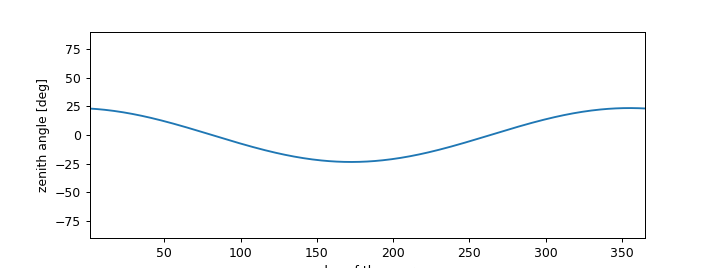

interactive(children=(IntSlider(value=0, description='Lat:', max=90, min=-90), Output()), _dom_classes=('widge…

<function __main__.pupdate(lat)>

In [8]:
%matplotlib notebook
latslider = IntSlider(value=0, min=-90, max=90, step=1, description='Lat:')
doy  = np.array([i for i in range(1, 366)])
sza  = np.array([get_solar_zenith(latslider.value, i) for i in range(1, 366)])

fig  = plt.figure(num=0, figsize=(8, 3))
ln,  = plt.plot(doy, sza, label=None)
plt.xlim(doy[0], doy[-1]); plt.ylim(-90, 90)  # set x,y limits
plt.ylabel("zenith angle [deg]")              # add ylabel 
plt.xlabel("day of the year")                 # add xlabel 

def pupdate(lat):
    """Update plot."""
    sza = np.array([get_solar_zenith(lat, i) for i in range(1, 366)])
    ln.set_ydata(sza)
  
interact(pupdate, lat=latslider)

## Albedos
https://www.umb.edu/spectralmass/terra_aqua_modis/v006/mcd43a1_brdif_albedo_model_parameters_product

### Black sky albedo
```shell   
  kernel                      k=iso     k=vol           k=geo
----------------------------------------------------------------------
  G_0k(term 1)                1.0      -0.007574       -1.284909  
  G_1k(term SZN^2)            0.0      -0.070987       -0.166314  
  G_2k(term SZN^3)            0.0       0.307588        0.041840   
----------------------------------------------------------------------

BLACK(SZN,BAND) = F_iso(BAND)*(G_0iso + G_1iso*SZN^2 + G_2iso*SZN^3) +
                  F_vol(BAND)*(G_0vol + G_1vol*SZN^2 + G_2vol*SZN^3) +
                  F_geo(BAND)*(G_0geo + G_1geo*SZN^2 + G_2geo*SNZ^3)
where
                  SZN:  solar zenith angle
                  BAND: RossThick-LiSparse_r kernel parameter for BAND
```
#### Func

In [9]:
def black(par1, par2, par3, sza):
    """Calculate black sky albedo for MCD43A1 band parameters."""
    
    iso = ( 1.000000,  0.000000, 0.000000)          # iso: Isotropic
    vol = (-0.007574, -0.070987, 0.307588)          # vol: RossThick
    geo = (-1.284909, -0.166314, 0.041840)          # geo: LiSparseR
    
    s = np.radians(sza)                             # get sza in radians
    sza2, sza3 = s**2, s**3                         # get exponentiated sza
    func = lambda p1, p2, p3: (                     # def apply function
        p1*(iso[0]+iso[1]*sza2+iso[2]*sza3)+        #  iso
        p2*(vol[0]+vol[1]*sza2+vol[2]*sza3)+        #  vol
        p3*(geo[0]+geo[1]*sza2+geo[2]*sza3))        #  geo
    
    return(xr.apply_ufunc(func, par1, par2, par3))

#### Plot

<IPython.core.display.Javascript object>


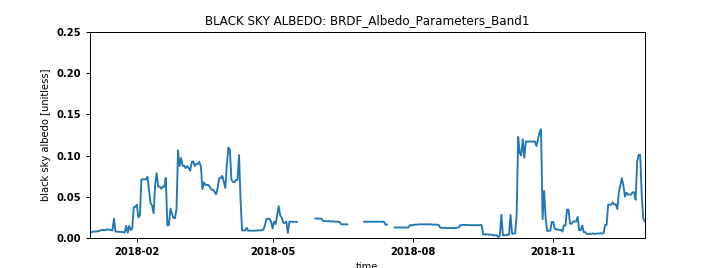

interactive(children=(FloatSlider(value=45.0, description='SZA', max=90.0, step=1e-05), Output()), _dom_classe…

In [10]:
%matplotlib notebook
from ipywidgets import FloatSlider, Dropdown, Layout
from docs.scripts.mcd43 import *

example_nc = "data/mcd43a1_one_pixel.nc4"           # example; only one pixel
px, sza, bands = prep(example_nc)                   # prep function: mcd43.py

band_name  = "BRDF_Albedo_Parameters_Band1"         # only plot band 1
band = px[band_name]
p1   = band.sel(param=0).squeeze()
p2   = band.sel(param=1).squeeze()
p3   = band.sel(param=2).squeeze()
bsa  = black(p1, p2, p3, 45.0)                      # black albedo

fig = plt.figure(num=1, figsize=(8,3))
ln, = bsa.plot(x="time", label=get_lab(band_name))

plt.xlim(px.time[0].data, px.time[-1].data)         # set x limits
plt.ylim(0.00, 0.25)                                # set y limits
plt.ylabel("black sky albedo [unitless]")           # add ylabel 
plt.title("BLACK SKY ALBEDO: "+band_name)

def update(SZA):
    ln.set_ydata(black(p1, p2, p3, SZA))

interact(update, SZA=FloatSlider(min=0, max=90, step=0.00001, value=45.0));

### White sky albedo
The formula for white sky albedo is:
```shell
  kernel                      k=iso     k=vol           k=geo
----------------------------------------------------------------------
  WSA                         1.0       0.189184       -1.377622 
----------------------------------------------------------------------

WSA(BAND) = iso(BAND)* 1.0      + 
            vol(BAND)* 0.189184 + 
            geo(BAND)*-1.377622
where
            BAND: RossThick-LiSparse_r kernel parameter for BAND
```
#### Func

In [11]:
def white(par1, par2, par3):
    """ """
    func = lambda p1, p2, p3: (
        p1* 1.000000 +                             # Isotropic
        p2* 0.189184 +                             # RossThick
        p3*-1.377622 )                             # LiSparseR 
    return(xr.apply_ufunc(func, par1, par2, par3))

#### Plot

<IPython.core.display.Javascript object>


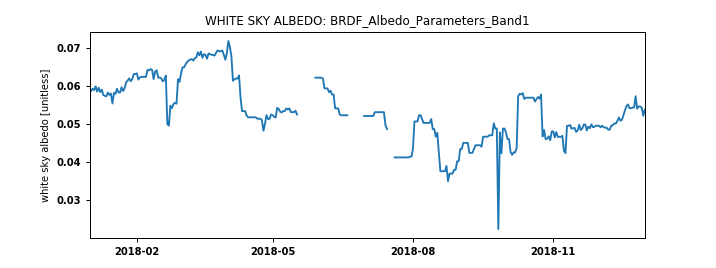

Text(0.5, 1.0, 'WHITE SKY ALBEDO: BRDF_Albedo_Parameters_Band1')

In [12]:
%matplotlib notebook
wsa = white(p1, p2, p3)

plt.figure(num=2, figsize=(8,3),)
plt.plot(px.time, wsa, label=band_name.split("_")[-1])
plt.xlim(px.time[0].data, px.time[-1].data)            # set x limits
plt.ylabel("white sky albedo [unitless]")              # add ylabel 
plt.title("WHITE SKY ALBEDO: "+band_name)              # add title

### Blue sky albedo

The cell below creates an interactive plot that will respond to adjustments of the solar zenith angle and optical depth Sliders, and the bands Dropdown:

<IPython.core.display.Javascript object>


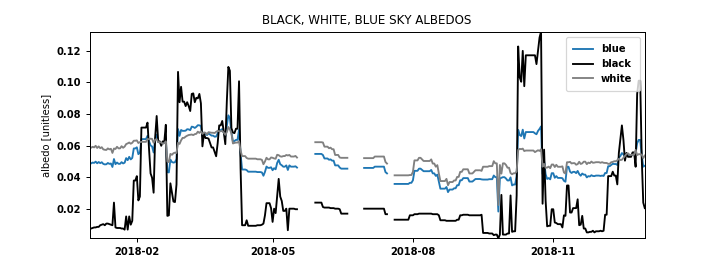

interactive(children=(Dropdown(description='BAND', layout=Layout(width='40%'), options=('BRDF_Albedo_Parameter…

In [13]:
%matplotlib notebook

def blue(wsa, bsa, lookup):
    """Vectorize albedo polynomials over two 3d arrays."""
    func = lambda white,black,lookup: (white*lookup) + (black*(1 - lookup))
    return(xr.apply_ufunc(func, wsa, bsa, lookup))

def lookup(band, sza, sod=0.20):
    """Look up blue albedo skyl_lut value."""    
    od = '%.2f' % sod
    luc = band.lookup[od]
    lfunc = lambda s: luc.iloc[s]
    return(xr.apply_ufunc(lfunc, abs(sza).round()))

def get_ylim(bsa,wsa,alb):
    a = np.array([bsa,wsa, alb])
    return(np.nanmin(a), np.nanmax(a))


# albedos --------------------------------------------------------------------

bsa = black(p1, p2, p3, sza)
wsa = white(p1, p2, p3)
lu  = lookup(px[band_name], sza).values.reshape(sza.shape)
alb = blue(bsa, wsa, lu)

# plot -----------------------------------------------------------------------

fig = plt.figure(num=3, figsize=(8,3))
lalb, = plt.plot(px.time, alb, label="blue")
lbsa, = plt.plot(px.time, bsa, label="black", color="black")
lwsa, = plt.plot(px.time, wsa, label="white", color="gray")

plt.xlim(px.time[0].data, px.time[-1].data)     # set x limits
plt.ylim(get_ylim(bsa,wsa,alb))                 # set y limits
plt.legend(loc="upper right", borderpad=0.75)   # add legend
plt.ylabel("albedo [unitless]")                 # add ylabel 
plt.title("BLACK, WHITE, BLUE SKY ALBEDOS")

# widgets and events ---------------------------------------------------------

def update_ylim(change):
    plt.ylim(get_ylim(bsa,wsa,alb))

def update(BAND, SZA, SOD):
    band = px[BAND]
    
    p1, p2, p3 = [band.sel(param=n).squeeze() for n in [0,1,2]]
    bsa = black(p1, p2, p3, SZA)
    wsa = white(p1, p2, p3)
    
    sza = np.array([SZA]*365)
    lu  = lookup(band, sza, SOD).values.reshape(sza.shape)
    alb = blue(bsa, wsa, lu)
    
    lbsa.set_ydata(bsa)
    lwsa.set_ydata(wsa)
    lalb.set_ydata(alb)
    
    plt.ylim(min([bsa.min().item(), wsa.min().item(), alb.min().item()]),
             max([bsa.max().item(), wsa.max().item(), alb.max().item()]))

lyt   = Layout(width="40%")
wsza  = FloatSlider(min=0, max=90, step=0.00001, value=45.0, layout=lyt)
wod   = FloatSlider(min=0.02, max=0.98, step=0.02, value=0.20, layout=lyt) 
wband = Dropdown(options=bands, value=bands[0], layout=lyt)
wband.observe(update_ylim, names='value')

interact(update, BAND=wband, SZA=wsza, SOD=wod);